In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from datetime import datetime

In [6]:
cd F:\IwB\semestr1\ziwo

F:\IwB\semestr1\ziwo


In [7]:
# Wczytanie danych
orderLines = pd.read_csv('orderlines.csv', sep=";")
orderLines1 = pd.read_csv('orderlines.csv', sep=";")
orderLines2 = pd.read_csv('orderlines.csv', sep=";")
products = pd.read_csv('products.csv', sep=";")
products1 = pd.read_csv('products.csv', sep=";")[['productid', 'productgroupname']]
products2 = pd.read_csv('products.csv', sep=";")[['productid', 'productgroupname']]

In [8]:
orderLinesCJ = orderLines1.merge(orderLines2, on="orderid", suffixes=('_x', '_y')) 
orderLinesCJ

,orderlineid_x,orderid,productid_x,shipdate_x,billdate_x,unitprice_x,numunits_x,totalprice_x,orderlineid_y,productid_y,shipdate_y,billdate_y,unitprice_y,numunits_y,totalprice_y
0,1010561,1006414,10834,2011-03-07 00:00,2011-03-08 00:00,18.00,1,18.00,1010561,10834,2011-03-07 00:00,2011-03-08 00:00,18.00,1,18.00
1,1010561,1006414,10834,2011-03-07 00:00,2011-03-08 00:00,18.00,1,18.00,1010560,10842,2011-01-19 00:00,2011-01-20 00:00,18.00,1,18.00
2,1010560,1006414,10842,2011-01-19 00:00,2011-01-20 00:00,18.00,1,18.00,1010561,10834,2011-03-07 00:00,2011-03-08 00:00,18.00,1,18.00
3,1010560,1006414,10842,2011-01-19 00:00,2011-01-20 00:00,18.00,1,18.00,1010560,10842,2011-01-19 00:00,2011-01-20 00:00,18.00,1,18.00
4,1010562,1006541,11052,2011-01-19 00:00,2011-01-20 00:00,10.00,2,20.00,1010562,11052,2011-01-19 00:00,2011-01-20 00:00,10.00,2,20.00
5,1010563,1006542,11070,2011-01-19 00:00,2011-01-20 00:00,19.12,1,19.12,1010563,11070,2011-01-19 00:00,2011-01-20 00:00,19.12,1,19.12
6,1010564,1010154,11196,2009-11-19 00:00,2009-11-20 00:00,14.95,1,14.95,1010564,11196,2009-11-19 00:00,2009-11-20 00:00,14.95,1,14.95
7,1010565,1009110,11048,2009-11-11 00:00,2009-11-12 00:00,10.00,2,20.00,1010565,11048,2009-11-11 00:00,2009-11-12 00:00,10.00,2,20.00
8,1010565,1009110,11048,2009-11-11 00:00,2009-11-12 00:00,10.00,2,20.00,1010566,11196,2009-11-19 00:00,2009-11-20 00:00,14.95,2,29.90
9,1010566,1009110,11196,2009-11-19 00:00,2009-11-20 00:00,14.95,2,29.90,1010565,11048,2009-11-11 00:00,2009-11-12 00:00,10.00,2,20.00


In [9]:
differentProducts = orderLinesCJ[orderLinesCJ.productid_x < orderLinesCJ.productid_y]

In [10]:
pairs = differentProducts.groupby(["productid_x", "productid_y"]);
withCount = pairs.orderid.nunique().reset_index(name = "numberOfOrder")


In [11]:
products1["productid_x"] = products1.productid
products2["productid_y"] = products2.productid

In [12]:
withCount = withCount.merge(products1, on="productid_x")
withCount = withCount.merge(products2, on="productid_y")
#withCount = withCount.select({'numberOfOrder', 'productgroup_x', 'productgroup_y', 'productid_x', 'productid_y'})
#withCount.columns=['Number of orders', 'Product Group 1', 'Product Group 2', 'Product 1', 'Product 2']
tabela11 = withCount.sort_values(by = "numberOfOrder", ascending=False)
tabela11.head(n=10)

,productid_x,productid_y,numberOfOrder,productid_x,productgroupname_x,productid_y,productgroupname_y
16192,12820,13190,2588,12820,FREEBIE,13190,FREEBIE
5641,12819,12820,1848,12819,FREEBIE,12820,FREEBIE
23419,11048,11196,1824,11048,ARTWORK,11196,BOOK
9946,10956,12139,1483,10956,FREEBIE,12139,OCCASION
5401,12139,12820,1246,12139,OCCASION,12820,FREEBIE
14559,12820,12851,1085,12820,FREEBIE,12851,OCCASION
23589,11196,11197,670,11196,BOOK,11197,BOOK
16729,12820,13254,592,12820,FREEBIE,13254,OCCASION
30799,12820,12826,589,12820,FREEBIE,12826,ARTWORK
23069,11053,11088,584,11053,ARTWORK,11088,OCCASION


In [13]:
#Usunięcie zdublowanych kolumn, powstałych podczas mergowania
datab = tabela11[['productid_x','productid_y','numberOfOrder','productgroupname_x','productgroupname_y']]
datab = datab.loc[:,~datab.columns.duplicated()]
datab.head(n=10)

,productid_x,productid_y,numberOfOrder,productgroupname_x,productgroupname_y
16192,12820,13190,2588,FREEBIE,FREEBIE
5641,12819,12820,1848,FREEBIE,FREEBIE
23419,11048,11196,1824,ARTWORK,BOOK
9946,10956,12139,1483,FREEBIE,OCCASION
5401,12139,12820,1246,OCCASION,FREEBIE
14559,12820,12851,1085,FREEBIE,OCCASION
23589,11196,11197,670,BOOK,BOOK
16729,12820,13254,592,FREEBIE,OCCASION
30799,12820,12826,589,FREEBIE,ARTWORK
23069,11053,11088,584,ARTWORK,OCCASION


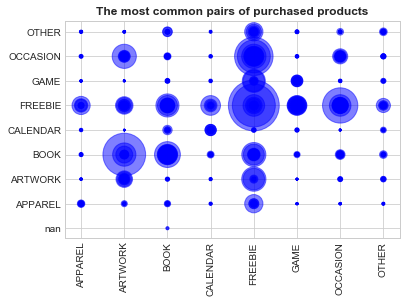

In [14]:
#utworzenie wykresu, przedstawiającego liczbę zamówień w zależności od wybranych par produktów
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import cufflinks as cf

bubbles_mpl = plt.figure()
plt.style.use('seaborn-whitegrid')

x = datab['productgroupname_x']
y = datab['productgroupname_y']
z = datab['numberOfOrder']
plt.title('The most common pairs of purchased products', fontweight='bold')

plt.scatter(x,y,z ,c='b',marker='o',alpha=0.5 ,vmin='APPAREL',vmax='OTHER')
plt.xticks(rotation=90)
plt.show()


In [15]:
art1= datab.groupby(["productgroupname_x", "productgroupname_y"]).size().reset_index(name="Liczebnosc")

In [16]:
#Pogrupowanie grup par produktów wg malejącej liczby zamówień
art2=art1.sort_values(by = "Liczebnosc", ascending=False)
art2.head(n=10)

,productgroupname_x,productgroupname_y,Liczebnosc
9,ARTWORK,ARTWORK,10784
45,GAME,GAME,9185
18,BOOK,BOOK,8861
42,GAME,BOOK,4119
21,BOOK,GAME,2816
12,ARTWORK,FREEBIE,1281
50,OCCASION,BOOK,1149
22,BOOK,OCCASION,990
14,ARTWORK,OCCASION,962
10,ARTWORK,BOOK,900


In [17]:
#usunięcie linii, dla których produkty są z tych samych grup
differentProducts22 = art2[art2.productgroupname_x != art2.productgroupname_y]
pairs22 = differentProducts22.groupby(["productgroupname_x"]);
def top(pairs22,n=100,column='tip_pct'):
    return pairs22.sort_values(by=column)[-n:]

art33 = pairs22.apply(top, column = "Liczebnosc")
art33
#nadpisanie productgroupname_x, jeżeli pojawiła się ponowna identyczna kombinacja grup produktów
art33[['productgroupname_x','productgroupname_y']] = np.sort( art33[['productgroupname_x','productgroupname_y']], axis=1)
art33
#usunięcię rzędów powtarzających się grup produktów
art34= art33.drop_duplicates(['productgroupname_x','productgroupname_y'], keep='first')

In [18]:
#posortowanie wyniku, według liczebności. Dzięki temu można sprawdzić czy wykres prawidłowo przedstawia dane


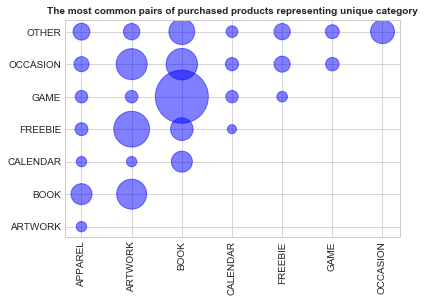

In [19]:
#utworzenie wykresu przedstawiającego najczęsciej występujące unikatowe pary produktów
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf

bubbles_mpl = plt.figure()
plt.style.use('seaborn-whitegrid')

x = art34['productgroupname_x']
y = art34['productgroupname_y']
z = art34['Liczebnosc']
plt.title('The most common pairs of purchased products representing unique category',fontsize=10, fontweight='bold')

plt.scatter(x,y,z, c='b',marker='o',alpha=0.5)
plt.xticks(rotation=90)
plt.show()